In [ ]:
pip install psycopg2

In [3]:
import psycopg2

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",  # Change this if your PostgreSQL server is hosted elsewhere
    port="5432"  # Default PostgreSQL port
)

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Execute a SQL query
cursor.execute("SELECT * FROM actor")

# Fetch results
rows = cursor.fetchall()

# Retrieve and display the header of the table
headers = [desc[0] for desc in cursor.description]
print(" | ".join(headers))

# Display the rows
for row in rows:
    print(" | ".join(str(cell) for cell in row))

# Close the cursor and connection
cursor.close()
conn.close()


actor_id | first_name | last_name | last_update
1 | Penelope | Guiness | 2013-05-26 14:47:57.620000
2 | Nick | Wahlberg | 2013-05-26 14:47:57.620000
3 | Ed | Chase | 2013-05-26 14:47:57.620000
4 | Jennifer | Davis | 2013-05-26 14:47:57.620000
5 | Johnny | Lollobrigida | 2013-05-26 14:47:57.620000
6 | Bette | Nicholson | 2013-05-26 14:47:57.620000
7 | Grace | Mostel | 2013-05-26 14:47:57.620000
8 | Matthew | Johansson | 2013-05-26 14:47:57.620000
9 | Joe | Swank | 2013-05-26 14:47:57.620000
10 | Christian | Gable | 2013-05-26 14:47:57.620000
11 | Zero | Cage | 2013-05-26 14:47:57.620000
12 | Karl | Berry | 2013-05-26 14:47:57.620000
13 | Uma | Wood | 2013-05-26 14:47:57.620000
14 | Vivien | Bergen | 2013-05-26 14:47:57.620000
15 | Cuba | Olivier | 2013-05-26 14:47:57.620000
16 | Fred | Costner | 2013-05-26 14:47:57.620000
17 | Helen | Voight | 2013-05-26 14:47:57.620000
18 | Dan | Torn | 2013-05-26 14:47:57.620000
19 | Bob | Fawcett | 2013-05-26 14:47:57.620000
20 | Lucille | Tracy | 20

In [5]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [13]:
import psycopg2
from prettytable import PrettyTable

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Execute a SQL query
cursor.execute("SELECT * FROM actor")

# Fetch results
rows = cursor.fetchall()

# Retrieve the headers (column names) from cursor description
headers = [desc[0] for desc in cursor.description]

# Create a PrettyTable object and set the field names
table = PrettyTable()
table.field_names = headers

# Add rows to the table
for row in rows:
    table.add_row(row)

# Display the table
print(table)

# Close the cursor and connection
cursor.close()
conn.close()


+----------+-------------+--------------+----------------------------+
| actor_id |  first_name |  last_name   |        last_update         |
+----------+-------------+--------------+----------------------------+
|    1     |   Penelope  |   Guiness    | 2013-05-26 14:47:57.620000 |
|    2     |     Nick    |   Wahlberg   | 2013-05-26 14:47:57.620000 |
|    3     |      Ed     |    Chase     | 2013-05-26 14:47:57.620000 |
|    4     |   Jennifer  |    Davis     | 2013-05-26 14:47:57.620000 |
|    5     |    Johnny   | Lollobrigida | 2013-05-26 14:47:57.620000 |
|    6     |    Bette    |  Nicholson   | 2013-05-26 14:47:57.620000 |
|    7     |    Grace    |    Mostel    | 2013-05-26 14:47:57.620000 |
|    8     |   Matthew   |  Johansson   | 2013-05-26 14:47:57.620000 |
|    9     |     Joe     |    Swank     | 2013-05-26 14:47:57.620000 |
|    10    |  Christian  |    Gable     | 2013-05-26 14:47:57.620000 |
|    11    |     Zero    |     Cage     | 2013-05-26 14:47:57.620000 |
|    1

In [12]:
import psycopg2
from datetime import datetime  # Import the datetime module

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Define the SQL query to insert a new row into the table
sql = "INSERT INTO actor (actor_id, first_name, last_name, last_update) VALUES (%s, %s, %s, %s)"

# Values to be inserted
values = (201, 'Kamilah', 'Wafa', datetime(2024, 4,19))

# Execute the query
cursor.execute(sql, values)

# Commit the transaction
conn.commit()

# Close the cursor and connection
cursor.close()
conn.close()


In [ ]:
pip install matplotlib

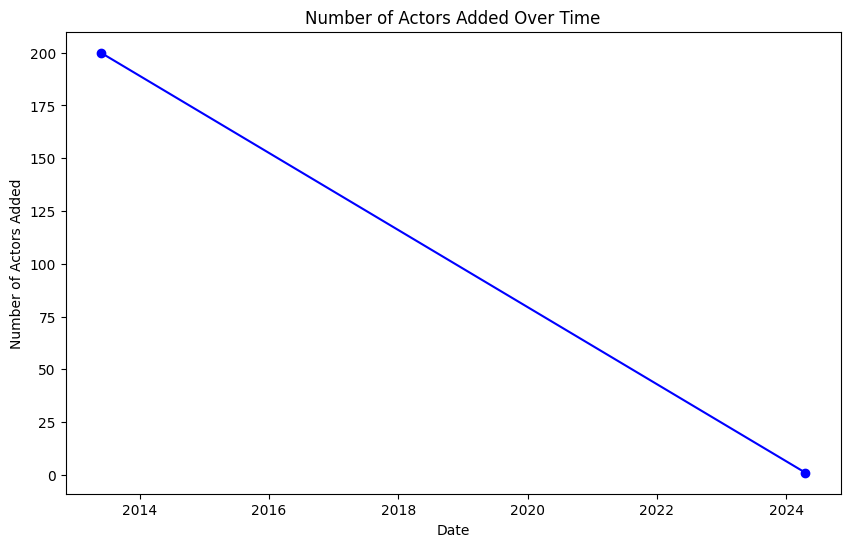

In [7]:
#step1:import necessary libraries
import psycopg2
import matplotlib.pyplot as plt
from datetime import datetime

#retrieve data from the database
# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a cursor object
cursor = conn.cursor()

# Define a SQL query to retrieve data from the actor table
# For example, count the number of actors added over time
sql = "SELECT last_update, COUNT(*) FROM actor GROUP BY last_update ORDER BY last_update"

# Execute the query
cursor.execute(sql)

# Fetch the data and store it in a variable
actor_data = cursor.fetchall()  # Data is a list of tuples (last_update, count)

# Close the cursor and connection
cursor.close()
conn.close()

#step2:process data
# Convert data into lists
last_update = [row[0] for row in actor_data]  # List of last_update dates
count = [row[1] for row in actor_data]  # List of counts of actors added

#step3:create visualization using matplotlib
# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(last_update, count, marker='o', linestyle='-', color='b')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Actors Added')
plt.title('Number of Actors Added Over Time')

# Display the plot
plt.show()


Descriptive Statistics for 'last_update':
count                              201
mean     2013-06-15 10:04:08.378109696
min         2013-05-26 14:47:57.620000
25%         2013-05-26 14:47:57.620000
50%         2013-05-26 14:47:57.620000
75%         2013-05-26 14:47:57.620000
max                2024-04-19 00:00:00
Name: last_update, dtype: object


C:\Users\Kamilah Wafa\AppData\Local\Temp\ipykernel_12956\364222280.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  actor_data = pd.read_sql(sql, conn)


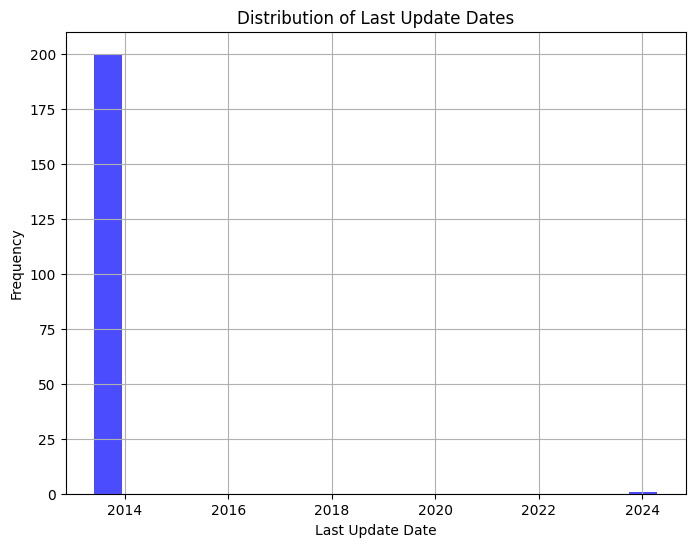

In [2]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a SQL query to retrieve data from the actor table
sql = """
    SELECT last_update
    FROM actor;
"""

# Execute the query and fetch the data using pandas
actor_data = pd.read_sql(sql, conn)

# Close the connection
conn.close()

# Convert the last_update column to datetime
actor_data['last_update'] = pd.to_datetime(actor_data['last_update'])

# Perform descriptive analysis
descriptive_stats = actor_data['last_update'].describe()

# Display the descriptive statistics
print("Descriptive Statistics for 'last_update':")
print(descriptive_stats)

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
actor_data['last_update'].hist(bins=20, alpha=0.7, color='blue')
plt.xlabel('Last Update Date')
plt.ylabel('Frequency')
plt.title('Distribution of Last Update Dates')
plt.show()


Comparison of actors and the number of films they have appeared in:
       actor_name  film_count
0  Gina Degeneres          42
1     Walter Torn          41
2     Mary Keitel          40
3  Matthew Carrey          39
4   Sandra Kilmer          37


C:\Users\Kamilah Wafa\AppData\Local\Temp\ipykernel_12956\3093768181.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  comparison_data = pd.read_sql(sql, conn)


<Figure size 1200x800 with 0 Axes>

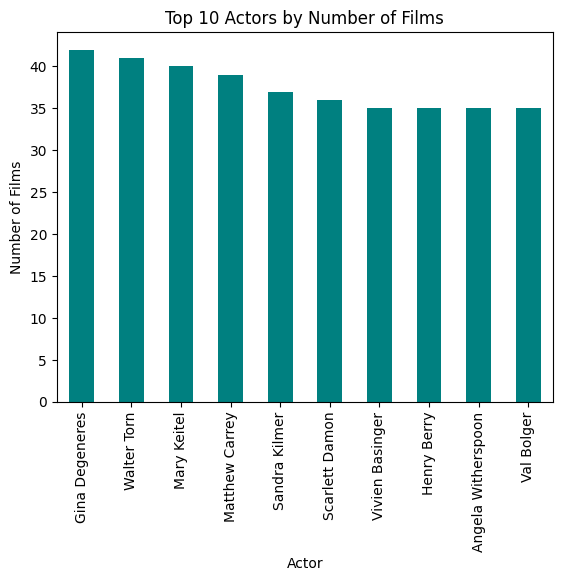

In [3]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a SQL query to retrieve data from the actor, film, and film_actor tables
# The query joins the tables to get the number of films each actor has appeared in
sql = """
    SELECT a.first_name || ' ' || a.last_name AS actor_name, COUNT(fa.film_id) AS film_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    JOIN film f ON fa.film_id = f.film_id
    GROUP BY a.actor_id
    ORDER BY film_count DESC;
"""

# Execute the query and fetch the data using pandas
comparison_data = pd.read_sql(sql, conn)

# Close the connection
conn.close()

# Display the first few rows of the comparison data
print("Comparison of actors and the number of films they have appeared in:")
print(comparison_data.head())

# Visualize the data using a bar chart
plt.figure(figsize=(12, 8))
comparison_data.head(10).plot(
    kind='bar',
    x='actor_name',
    y='film_count',
    color='teal',
    legend=False
)

# Add labels and title
plt.xlabel('Actor')
plt.ylabel('Number of Films')
plt.title('Top 10 Actors by Number of Films')

# Display the plot
plt.show()


Top 10 Film Categories:
  category_name  film_count
0        Sports          74
1       Foreign          73
2        Family          69
3   Documentary          68
4     Animation          66
5        Action          64
6           New          63
7         Drama          62
8        Sci-Fi          61
9         Games          61


C:\Users\Kamilah Wafa\AppData\Local\Temp\ipykernel_12956\555373848.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_categories = pd.read_sql(sql, conn)


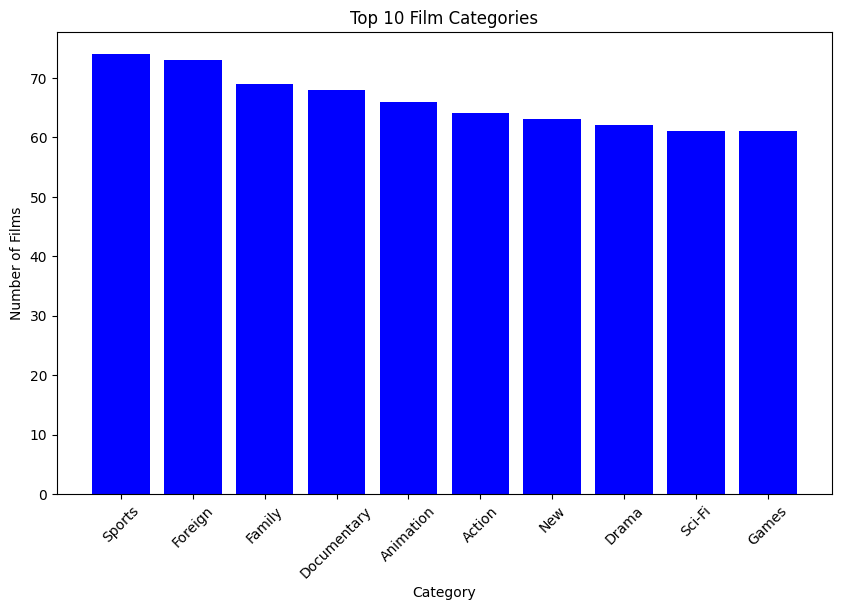

In [5]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a SQL query to retrieve the top 10 film categories
# The query joins the film_category and category tables and groups by category name
sql = """
    SELECT c.name AS category_name, COUNT(fc.film_id) AS film_count
    FROM film_category fc
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY c.name
    ORDER BY film_count DESC
    LIMIT 10;
"""

# Execute the query and fetch the data using pandas
top_categories = pd.read_sql(sql, conn)

# Close the connection
conn.close()

# Display the top 10 film categories
print("Top 10 Film Categories:")
print(top_categories)

# Visualize the top 10 film categories using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_categories['category_name'], top_categories['film_count'], color='blue')
plt.xlabel('Category')
plt.ylabel('Number of Films')
plt.title('Top 10 Film Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


C:\Users\Kamilah Wafa\AppData\Local\Temp\ipykernel_12956\3059402739.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  comparison_data = pd.read_sql(sql, conn)


<Figure size 1200x800 with 0 Axes>

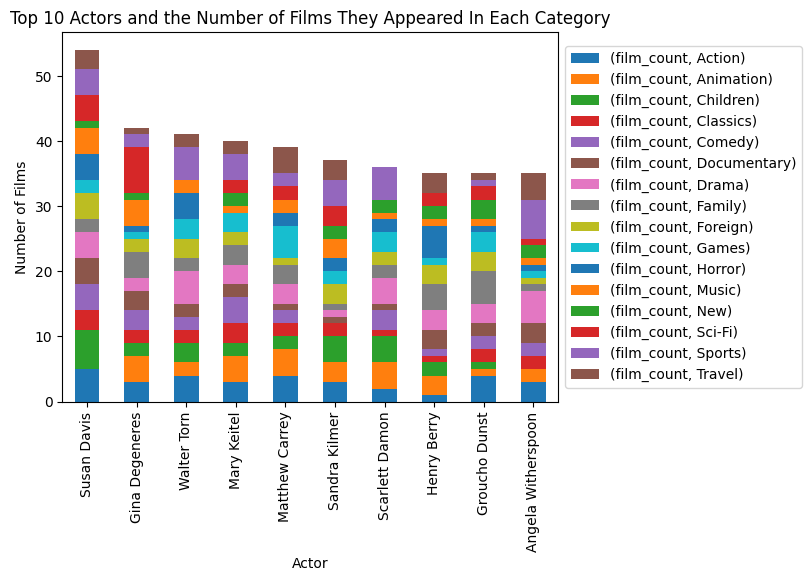

In [8]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

# Establish a connection to the database
conn = psycopg2.connect(
    dbname="dvdrental",
    user="postgres",
    password="postgres",
    host="localhost",
    port="5432"
)

# Create a SQL query to retrieve data from the actor, film, film_actor, and film_category tables
# The query joins the tables to get the number of films each actor has appeared in each category
sql = """
    SELECT a.first_name || ' ' || a.last_name AS actor_name, c.name AS category_name, COUNT(fc.film_id) AS film_count
    FROM actor a
    JOIN film_actor fa ON a.actor_id = fa.actor_id
    JOIN film f ON fa.film_id = f.film_id
    JOIN film_category fc ON f.film_id = fc.film_id
    JOIN category c ON fc.category_id = c.category_id
    GROUP BY a.actor_id, c.name
    ORDER BY film_count DESC;
"""

# Execute the query and fetch the data using pandas
comparison_data = pd.read_sql(sql, conn)

# Close the connection
conn.close()

# Group the data by actor and category, sum the film count
grouped_data = comparison_data.groupby(['actor_name', 'category_name']).sum()

# Calculate the total number of films each actor has appeared in
actor_film_counts = grouped_data.groupby('actor_name').sum()

# Sort actors by total number of films in descending order and select the top 10 actors
top_10_actors = actor_film_counts.sort_values(by='film_count', ascending=False).head(10)

# Filter the original grouped data to include only the top 10 actors
top_10_data = grouped_data.loc[top_10_actors.index]

# Visualize the top 10 actors and the number of films they have appeared in each category
plt.figure(figsize=(12, 8))
ax = top_10_data.unstack().plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Actor')
plt.ylabel('Number of Films')
plt.title('Top 10 Actors and the Number of Films They Appeared In Each Category')

# Customize the legend location to be beside the graph
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the plot
plt.show()
